In [20]:
import numpy as np
import torch

from datagen import solve_ocps
from nn import ActorResidualCritic
from optimal_control.ddp import init_ddp,extract_ddp_data
from optimal_control.samples import uniform_samples
from optimal_control.robot import load_robot
from optimal_control.path import exp_path
from optimal_control.viewer import animate_ddps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
plt.rc('text', usetex=True)

sns.set_context("paper",rc={"lines.linewidth": 2.5})
sns.axes_style("white")
sns.color_palette("husl", 3)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' :False,'grid.linestyle': '--'})


torch.manual_seed(0)
np.random.seed(0)

In [23]:
robot, config = load_robot(display=False)




Successfully Loaded Robot


In [24]:
exp_number  =   1
save_path   =   exp_path(exp_number=exp_number,make_path=False,get_path=True)


In [25]:
x0s = uniform_samples(nb_samples = 1, robot=robot, config=config)


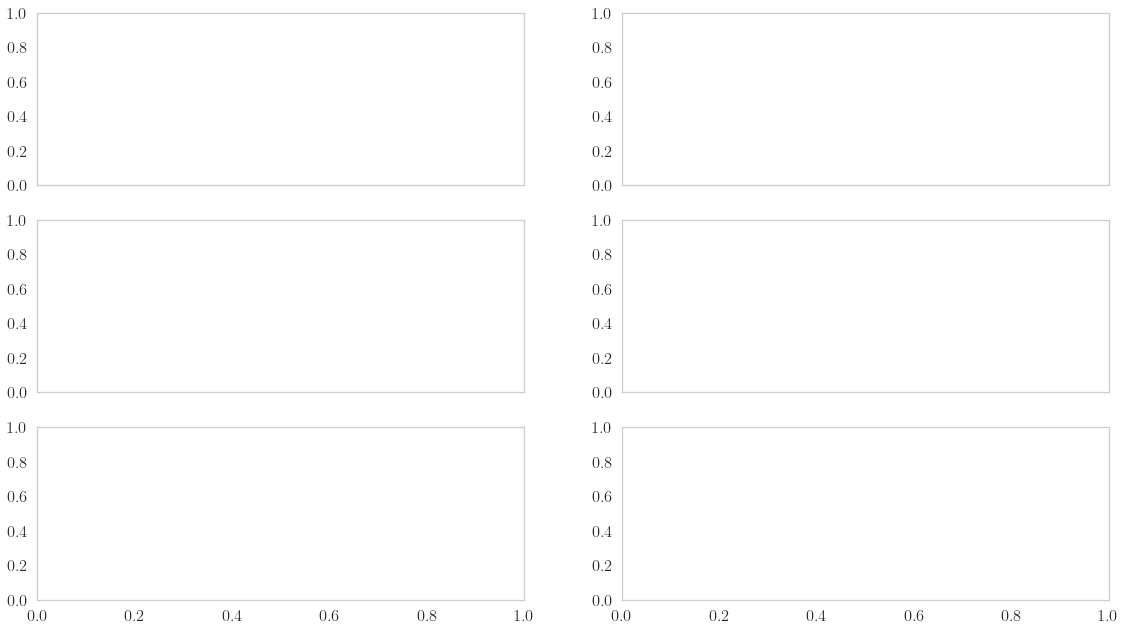

In [26]:
DPVP_DATAS = []
DDP_DATAS  = []



Rollouts required to solve this problem : 2


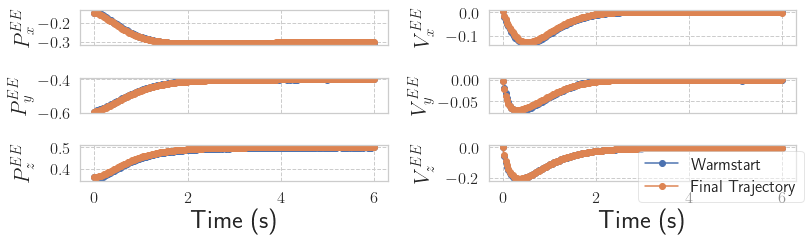

In [36]:
x0 = x0s[0]
dpvp_iter_number = 20
        
model       =   torch.load(save_path+f'/eps_{dpvp_iter_number}.pth')
#ddp.problem.x0 = x0
nq      =   robot.model.nq
q0      =   x0[:nq]
# Update robot model with initial state
robot.framesForwardKinematics(q0)
robot.computeJointJacobians(q0)

dpvp                 =   init_ddp(robot=robot,config=config,x0=x0,actorResidualCritic=model,N_h=model.horizon)
xs_init, us_init     =   model.warmstart(x0)
dpvp.solve(xs_init,us_init,maxiter=1000,isFeasible=False)
print(f"Rollouts required to solve this problem : {ddp.iter}")
dpvp_data            =   extract_ddp_data(dpvp)
dpvp_data["init_xs"] = xs_init
dpvp_data["init_us"] = us_init
DPVP_DATAS.append(dpvp_data)



fig,ax = plot_ddp_endeff(ddp_data=dpvp_data,
                  plot_warmstart=True,
                  x=None,
                  label="Warmstart",
                  SHOW=False,
                  marker='o')

fig,ax = plot_ddp_endeff(ddp_data=dpvp_data,
                  plot_warmstart=False,
                  x=None,
                  fig=fig,
                  ax=ax,
                  label="Final Trajectory",
                  SHOW=True,
                  marker='o')

In [ ]:
for 